## **<span style="color:gray; font-family:Garamond;"> Final Project - Group 45**
# <span style="color:black; font-family:Garamond;"> Journalists Killed Worldwide
### **<span style="color:black; font-family:Garamond;"> Name Of Students:**
**<span style="color:black; font-family:Garamond;">Lauren Mantzur<br>**
**<span style="color:black; font-family:Garamond;">Oreen Karavani<br>**
**<span style="color:black; font-family:Garamond;">Omer Levi**

    
<div>
<img src="https://github.com/Oreenk/project1/blob/main/csm_battleface-ifj-press-4_8a8191d543.jpg?raw=true" width="800"/>
<figcaption align="center">
    <small> </small>
</figcaption>
</div>

<a id='1'></a>

# <b id="section_1">  </b> <b style='color:brown; font-family:Garamond;'>Libraries ; </b> <b></b> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk
from IPython.display import Image

<div dir="rtl">

#### מידע ומטרת הפרוייקט:
##### מציאת קשרים שונים למוות של עיתונאים, ולבדוק כיצד אפשר להפחית את האלימות כלפיהם.
<br>נלקח מ: [קאגל](https://www.kaggle.com/datasets/cpjournalists/journalists-killed-worldwide-since-1992?select=cpj.csv)

 </div>

In [2]:
url = 'https://raw.githubusercontent.com/Oreenk/project1/main/cpj.csv'
jour_df = pd.read_csv(url)
jour_df.head(4)

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,22-Oct-16,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,21-Oct-16,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,2-Oct-16,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,14-Aug-16,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n


# <b id="section_2">  </b> <b style='color:green; font-family:Garamond;'>Add Columns And Data Changes ; </b> <b></b> 

<div dir="rtl">

###### בעמודה tortured הקובץ הגיע עם n/ לכן ביצענו שינויים בדאטה

In [3]:
jour_df['Tortured'] = jour_df['Tortured'].str.replace(r'\n', '').str.strip()
jour_df['Tortured'].replace('', np.nan, inplace=True)
unique_tor = jour_df['Tortured'].unique()
jour_df.head(4)

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,22-Oct-16,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
1,Motive Confirmed,21-Oct-16,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
2,Motive Confirmed,2-Oct-16,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
3,Motive Confirmed,14-Aug-16,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No


<div dir="rtl">

###### חלוקה לקטגוריות ושינויי type 

</div>

In [4]:
rows_and_col = jour_df.shape
print(rows_and_col)
jour_df.columns

(1782, 18)


Index(['Type', 'Date', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death', 'Impunity_for_murder',
       'Taken_captive', 'Threatened', 'Tortured'],
      dtype='object')

<div dir="rtl">

###### התאריכים התווספו לעמודות כfloat לכן שינינו אותן לint

In [5]:
jour_df['Date'] = pd.to_datetime(jour_df['Date'], errors='coerce')
jour_df['Year'] = jour_df['Date'].dt.year
jour_df['Month'] = jour_df['Date'].dt.month

C:\Users\oreen\AppData\Local\Temp\ipykernel_22936\191672598.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jour_df['Date'] = pd.to_datetime(jour_df['Date'], errors='coerce')


In [6]:
jour_df['Year'] = jour_df['Year'].astype('Int64')
jour_df['Month'] = jour_df['Month'].astype('Int64')

<div dir="rtl">

###### חילוץ תחומים למספר עמודות

In [7]:
jour_df['Coverage'] = jour_df['Coverage'].fillna('').astype(str)

In [8]:
jour_df['Classify cover'] = jour_df['Coverage'].apply(lambda x: x.split(', '))

In [9]:
unique_coverage = set([category for sublist in jour_df['Classify cover'] for category in sublist])

In [10]:
for category in unique_coverage:
    if category != '':
        jour_df[category] = jour_df['Classify cover'].apply(lambda x: category in x)

In [11]:
jour_df[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']] = jour_df[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']].astype(int)

In [12]:
jour_df.info()
empty = jour_df.isnull().sum()

jour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Type                 1782 non-null   object        
 1   Date                 1724 non-null   datetime64[ns]
 2   Name                 1782 non-null   object        
 3   Sex                  1216 non-null   object        
 4   Country_killed       1781 non-null   object        
 5   Organization         1779 non-null   object        
 6   Nationality          1499 non-null   object        
 7   Medium               1216 non-null   object        
 8   Job                  1210 non-null   object        
 9   Coverage             1782 non-null   object        
 10  Freelance            1217 non-null   object        
 11  Local_Foreign        1217 non-null   object        
 12  Source_fire          1215 non-null   object        
 13  Type_death           1217 non-nul

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,...,Month,Classify cover,Culture,Politics,Sports,Corruption,Human Rights,Crime,Business,War
0,Motive Confirmed,2016-10-22,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,...,10,[War],0,0,0,0,0,0,0,1
1,Motive Confirmed,2016-10-21,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",...,10,"[Politics, War]",0,1,0,0,0,0,0,1
2,Motive Confirmed,2016-10-02,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",...,10,"[Politics, War]",0,1,0,0,0,0,0,1
3,Motive Confirmed,2016-08-14,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,...,8,[War],0,0,0,0,0,0,0,1
4,Motive Confirmed,2016-08-08,Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",...,8,"[Business, Corruption, Crime, Culture, Human R...",1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,1992-08-03,Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,NaN,NaN,,...,8,[],0,0,0,0,0,0,0,0
1778,Motive Unconfirmed,1992-07-03,Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,NaN,NaN,,...,7,[],0,0,0,0,0,0,0,0
1779,Motive Unconfirmed,1992-06-02,Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,NaN,NaN,,...,6,[],0,0,0,0,0,0,0,0
1780,Motive Unconfirmed,1992-02-27,Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,NaN,NaN,,...,2,[],0,0,0,0,0,0,0,0


<div dir="rtl">
    
__________________________________________
###### 1 - תיקון העמודה tortured שלא הוצגה כראוי
###### 2 - הוספת עמודות: חודש ושנה
###### 3 - תחום הסיקור של העיתונאי - הפיכה מטיפוס בוליאני לנומרי, כך שכל תחום יהווה עמודה חדשה שנוכל לסכום
__________________________________________
</div>

# <b id="section_3">  </b> <b style='color:purple; font-family:Garamond;'>Countries & Distribution ; </b> <b></b>

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\oreen\AppData\Local\Temp\ipykernel_22936\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [14]:
country_counts = jour_df['Country_killed'].value_counts().reset_index().copy()
country_counts.columns = ['name', 'count']

In [15]:
world = world.merge(country_counts, how='left', left_on='name', right_on='name')

<Axes: >

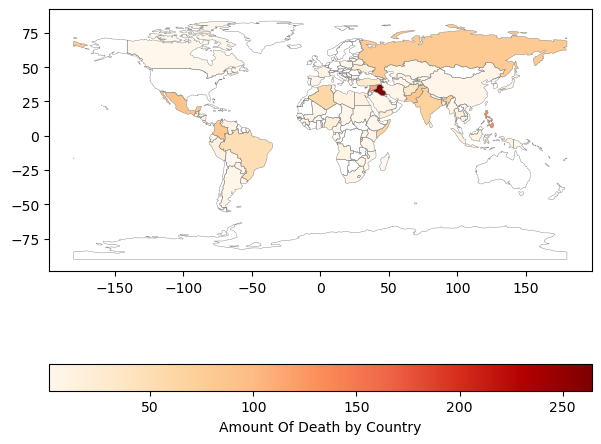

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
world.boundary.plot(ax=ax, linewidth=0.31, color='grey')
world.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Amount Of Death by Country",'orientation': "horizontal"}, cmap='OrRd')

<div dir="rtl"> 

#### מסקנה 1 - העיתונאי הכי מאויים

</div>

In [17]:
topTen = jour_df['Country_killed'].value_counts().nlargest(10).index

In [18]:
Ten_jour = jour_df[jour_df['Country_killed'].isin(topTen)]

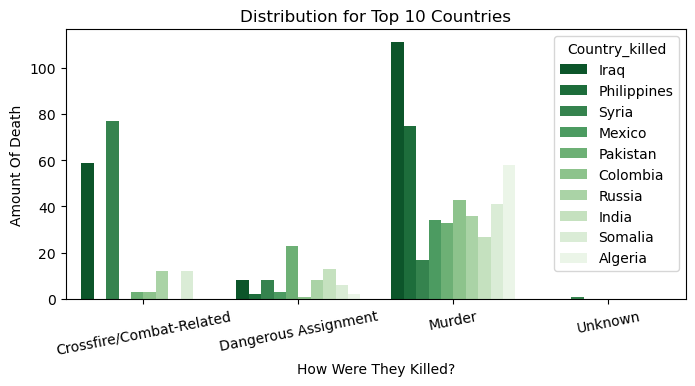

In [19]:
plt.figure(figsize=(8,3.5))
sns.countplot(data=Ten_jour, x='Type_death', hue='Country_killed', palette="Greens_r",  hue_order=topTen)

plt.title('Distribution for Top 10 Countries')
plt.xlabel('How Were They Killed?')
plt.ylabel('Amount Of Death')
plt.xticks(rotation=11)
plt.show()

<div dir="rtl">

____________  
#### 1. הסיבות בגללן מתו העיתונאים:
###### במבט על, ניתן להסיק כי רוב מקרי המוות בקרב עיתונאים הם מקרי רצח.
__________
######  1. מדינות עולם שלישי הן מדינות רוויות בפשיעה. מאוד הגיוני ששם יירצחו הרבה עיתונאים כי בלי קשר רצח שם נפוץ מאוד.

###### 2. בין המדינות הערביות לעומת זאת יש הבדלים:

######  * בסוריה - הרוב המוחלט נהרגו בחילופי אש ולא במכוון. 
###### * בעיראק - לעומת זאת, הרוב נרצחו - מה שגורם לתהייה. האם במדינות ערביות יש פחות חמלה כלפי עיתונאים או שזה תלוי במדינה עצמה בלבד?
###### עיראק בדומה לסוריה, חווה מלחמות רבות, ועדיין,
###### פי 2 מהעיתונאים נהרגו בכוונת מכוון. ניתן להבין כי עיראק מסוכנת לעיתונאים הרבה יותר מכל מדינה אחרת.
_____________
###### תופעת הרצח גורמת למחאות נרחבות בעולם, ומעוררת שאלות רבות לגבי בטחון העיתונאים והסיכונים הכרוכים בהעברת המידע לציבור.
###### על מנת להבין טוב יותר את התפלגות ההרוגים, נציג גרפי פיזור ומדינות חריגות.
###### נבדוק האם בכל המדינות יש רוב של נרצחים, או שיש מדינות שמפרות את המאזן
</div>

In [20]:
murder_counts = jour_df[jour_df["Type_death"] == "Murder"].groupby("Country_killed").size()
crossfire_counts = jour_df[jour_df["Type_death"] == "Crossfire/Combat-Related"].groupby("Country_killed").size()
assignment_counts = jour_df[jour_df["Type_death"] == "Dangerous Assignment"].groupby("Country_killed").size()

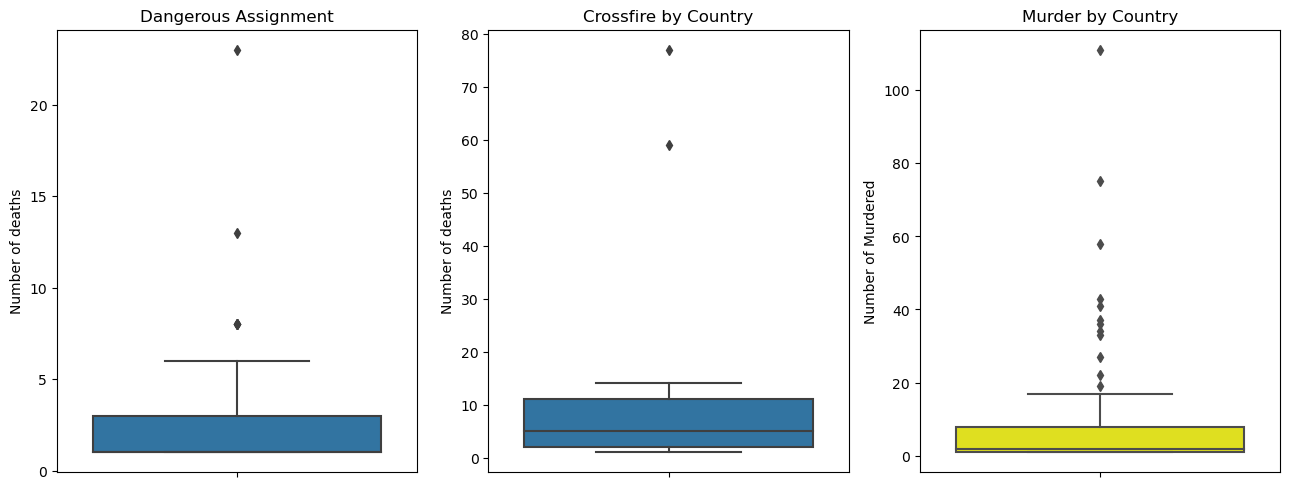

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

sns.boxplot(y=murder_counts, ax=axes[2], color='yellow')
axes[2].set_title('Murder by Country')
axes[2].set_ylabel('Number of Murdered')

sns.boxplot(y=crossfire_counts, ax=axes[1])
axes[1].set_title('Crossfire by Country')
axes[1].set_ylabel('Number of deaths')

sns.boxplot(y=assignment_counts, ax=axes[0])
axes[0].set_title('Dangerous Assignment')
axes[0].set_ylabel('Number of deaths')

plt.tight_layout()
plt.show()

<div dir="rtl">

###### מדדי הפיזור של כלל המקרים די זהים, בין 0 ל10 הרוגים בכל קטגוריה.
___________
######  דבר זה מוכיח כי הסתכלות חלקית על הנתונים אינה משקפת תמיד את המציאות.
######  במקרי הרצח מופיעים הרבה "חריגים". יש מדינות מסויימות שבהם נרשמו כמויות גבוהות של רציחות המשפיעות על האיזון באופן מובהק
___________
###### מצב זה מעלה תהיות, נמשיך לחקור במטרה להגיע למסקנות חשובות בנוגע לסכנות הצפויות לעיתונאים. נשאל את עצמנו:

<div dir="rtl">
    
##### האם יש נושאים שמסוכן יותר לסקר?

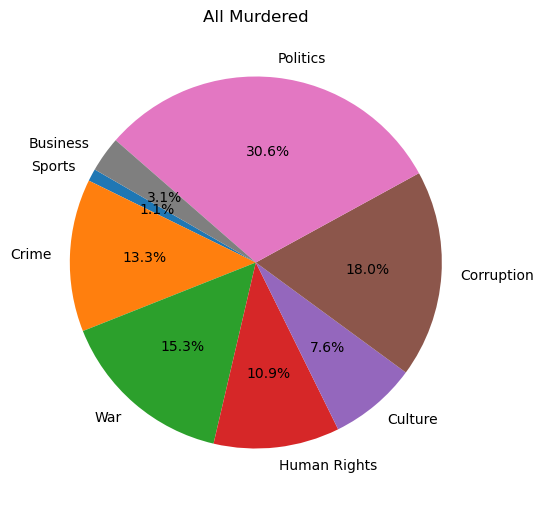

In [22]:
murdered = jour_df[jour_df['Type_death'] == 'Murder']

sports = murdered['Sports'].sum()
crime = murdered['Crime'].sum()
war = murdered['War'].sum()
human_rights = murdered['Human Rights'].sum()
culture = murdered['Culture'].sum()
corruption = murdered['Corruption'].sum()
politics = murdered['Politics'].sum()
busines = murdered['Business'].sum()


counts = [sports, crime, war, human_rights, culture, corruption, politics, busines]
fields = ['Sports', 'Crime', 'War', 'Human Rights', 'Culture', 'Corruption', 'Politics', 'Business']

plt.figure(figsize=(6, 10))
plt.pie(counts, labels=fields, autopct='%1.1f%%', startangle=150)
plt.title('All Murdered')
plt.show()

<div dir="rtl">

##### האם יש נושאים שמסוכן יותר לסקר?

<div dir="rtl">
    
_________
##### מסקנה על פי הגרפים:
_________
###### התשובה היא - כן. יש תחומים שמסוכן יותר לסקר.
###### לא מפתיע שהחלוקה אינה שווה.
###### מה שכן מנוגד להיגיון -  כתבים לענייני שחיתות ופוליטיקה נרצחים יותר מכתבים לעינייני פשיעה ומלחמה.
__________________________
###### סיקור פוליטי וחשיפת שחיתות גורמת לעיתונאים להיות פגיעים יותר  (אפילו יותר מאזורי לחימה). 
__________________________
###### 1. ייתכן ובעלי כוח מנצלים את מעמדם - אנשים בכירים משפיעים על הסביבה, מה שגורם לתומכיהם לנהוג באלימות כלפי העיתונאים שחשפו את האמת.
###### רוב מקרי הרצח הם פעולות נקם, אך מפתיע שנציגי ציבור נותנים לזה יד.

###### 2. הבעת דעה פוליטית עלולה לסכן את חיי העיתונאים. רצוי להימנע מלהביע עמדה פוליטית, ולסקר את האירוע בצורה
###### אובייקטיבית ומקצועית. 
###### אפשר לראות כי במדינות דיקטטוריות וערביות יש רוב של נרצחים, מלבד סוריה כמובן.

# <b id="section_4">  </b> <b style='color:blue; font-family:Garamond;'>Ratio and Connections ; </b> <b></b>

In [23]:
total_females = jour_df[jour_df['Sex'] == 'Female'].shape[0]
total_males = jour_df[jour_df['Sex'] == 'Male'].shape[0]
print('There is', total_females, 'Woman and', total_males, 'Man that killed. the rest are unknown')

There is 80 Woman and 1136 Man that killed. the rest are unknown


<div dir="rtl">

###### הרוב המוחלט של העיתונאים שנהרגו הם גברים !
######  נרצה לשמור על היחס בין הנרצחים לנרצחות.  מי מבין המינים נתון לסכנה גדולה יותר?

In [24]:
female_murdered = murdered[murdered['Sex'] == 'Female'].shape[0]
male_murdered = murdered[murdered['Sex'] == 'Male'].shape[0]

female_murdered_percentage = (female_murdered / total_females) * 100
male_murdered_percentage = (male_murdered / total_males) * 100

In [25]:
ratio = male_murdered_percentage / female_murdered_percentage
print('Man : Woman =',ratio)

Man : Woman = 0.9117865085248332


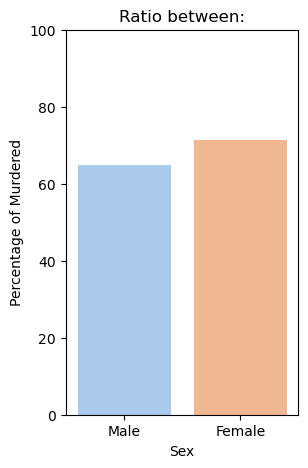

In [26]:
murdered_percentages = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Percentage': [male_murdered_percentage, female_murdered_percentage]})

plt.figure(figsize=(3, 5))
sns.barplot(x='Sex', y='Percentage', data=murdered_percentages, palette='pastel')
plt.title('Ratio between:')
plt.xlabel('Sex')
plt.ylabel('Percentage of Murdered')
plt.ylim(0, 100)
plt.show()

<div dir="rtl"> 

###### אמנם מעמד האישה בעולם כן מתפתח עם השנים אך לא כך בתחום העיתונות.
###### הנתונים מראים כי באופן יחסי נשים נרצחות בשיעור גבוה יותר מגברים ומדובר בעובדה מדאיגה במיוחד.
###### הסטטיסטיקה הזו מצביעה על הצורך להמשיך ולהיאבק למען שוויון מגדרי בתחום העיתונות, וכן להבטיח להן סביבת עבודה בטוחה יותר.
###### חשוב מאוד לקדם חקיקה שתאפשר הגנה על עיתונאים ועיתונאיות כאחד, בדגש על הגברת המודעות כלפי נשים בתקשורת.

<div dir="rtl">
 
 ## האם יש קשר בין מוצא העיתונאי לבין קבלת פטור מעונש ?

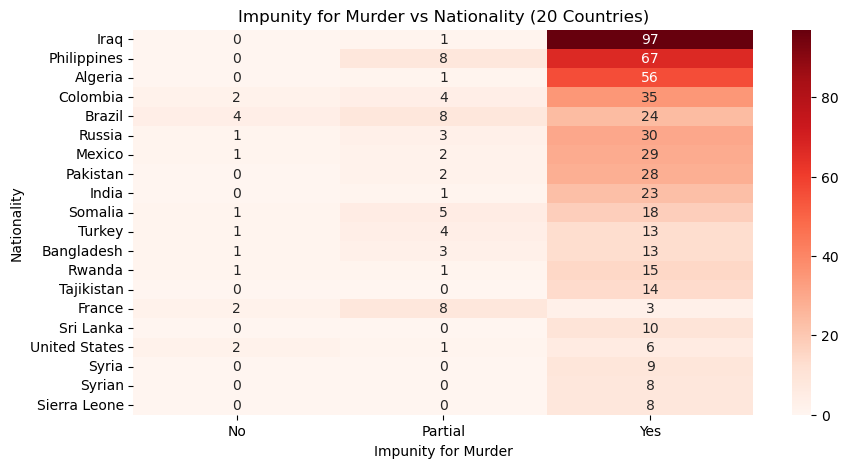

In [27]:
jour_df['Nationality'] = jour_df['Nationality'].replace({'Philippine': 'Philippines'})
impunity_job_cross = pd.crosstab(jour_df['Nationality'], jour_df['Impunity_for_murder'])

top_20_countries = impunity_job_cross.sum(axis=1).sort_values(ascending=False).head(20).index
impunity_job_cross_top_20 = impunity_job_cross.loc[top_20_countries]

plt.figure(figsize=(10, 5))
sns.heatmap(impunity_job_cross_top_20, annot=True, cmap='Reds', fmt='d')
plt.title('Impunity for Murder vs Nationality (20 Countries)')
plt.xlabel('Impunity for Murder')
plt.ylabel('Nationality')
plt.show()

<div dir="rtl">

######  יש קשר בין הלאום לבין קבלת חסינות !
###### ישנם הרבה עיתונאים שנרצחו כנקמה על עבודתם כאשר הנאשם לא נתן את הדין.
###### חמשת המדינות המובילות בנתינת חסינות הן עיראק, אלג'יריה, קולומביה, פיליפינים וברזיל.
###### מה שמשותף למדינות אלה הוא סכסוך, פשיעה, חוסר יציבות פוליטית ושלטון חוק חלש. ייתכן וכי מדינות אלה 
###### אינן משקיעות במשאבים ובחיפוש צדק למען העיתונאים שנרצחו, ומעדיפים לטייח את הנושא.

##### נחזור להתפלגות בגרף הפאי בה ראינו שפוליטיקה ושחיתות הן הסיבות המובילות לרצח -
##### הסקנו כי בעלי מעמד מנצלים את כוחם. כעת ניתן לראות כי קטע זה מאשש את מסקנתנו.

<br>להלן קטע הלקוח מתוך [הכתבה](https://cpj.org/reports/2022/11/killing-with-impunity-vast-majority-of-journalists-murderers-go-free/) 
__________________________________
"even in less volatile countries with democratically elected governments, authorities show little political will for prosecuting journalists killers or curbing violence against the press. **Rather, leaders, such as Mexican President** Andrés Manuel López Obrador **and Brazilian President** Jair Bolsonaro, **regularly launch verbal attacks on the media even as reporters face constant threats for their vital reporting on crime, corruption, and environmental issues** 
___________________________________

<div>
<img src="https://github.com/Oreenk/project1/blob/main/%D7%94%D7%95%D7%A8%D7%93%D7%94.jpg?raw=true" width="500"/>
<figcaption align="center">
    <small> </small>
</figcaption>
</div>

<div dir="rtl">

__________________________    
#### האם כאלה שעברו עינויים גם קיבלו איומים? או שמא לא ניתן לדעת למה יקרה לעיתונאי בעת סיקור?

In [28]:
connection = jour_df.copy()

connection['Taken_captive'] = connection['Taken_captive'].map({'Yes': 1, 'No': 0})
connection['Threatened'] = connection['Threatened'].map({'Yes': 1, 'No': 0})
connection['Tortured'] = connection['Tortured'].map({'Yes': 1, 'No': 0})
connection['Freelance'] = connection['Freelance'].map({'Yes': 1, 'No': 0})

In [29]:
relevant_connection = connection[['Taken_captive', 'Threatened', 'Tortured', 'Freelance']]

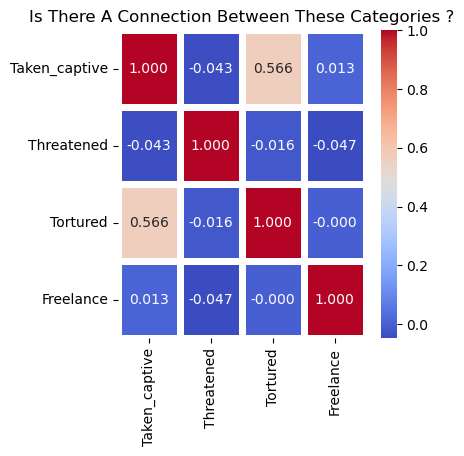

In [30]:
correlation_matrix = relevant_connection.corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=5)
plt.title('Is There A Connection Between These Categories ?')
plt.show()

<div dir="rtl">

###### בין אלו שנלקחו בשבי לבין אלו שאוימו בצורה כלשהי, אין קשר כלל. 
###### כן אפשר לראות שמי שנחטף עבר עינויים כלשהם.אך משום שמקדם הקורלציה הוא 0.56 (בין "עבר עינויים" לבין "נלקח בשבי")
###### אפשר להסיק כי מטרת החוטפים היא לא בהכרח לגרום לסבלם של העיתונאים.
###### יכול להיות שחטיפה היא הדרך שלהם לבקש כופר ולהרוויח כסף, או להשתמש בזה למטרות מסויימות.
###### חשבנו שיהיה קשר גבוה בין פרילנסרים לקבלת איום כי אין להם מעטפת הגנה (מצד הארגון או העבודה)
###### אך על פי הנתונים ניתן לראות כי אין קשר שמחזק את השערתנו.
###### אין באמת דרך לצמצם את מקרי המוות על פי ההקשרים הללו, חשבנו שיהיה קשר הדוק אך כאן קיבלנו סתירה.

_________________

<div dir="rtl">

### מסקנה 2 - מוות של עיתונאים בישראל  
###### כישראלים, נרצה לבדוק את ההתנהלות כלפי עיתונאים המסקרים בארץ
###### האם כמו במדינות אחרות ישראל מטייחת מקרי מוות, או שמא יש יחס שונה?
###### ישראל היא מוקד משמעותי לסיקור, בעיקר בתחומי צבא ומלחמות מול המדינות הסובבות אותנו. לכן, עיתונאים נמצאים באזורי קרב חשופים למקורות ירי שונים, צבא, ירי מחבלים וכדומה.

In [31]:
all_Israel = jour_df[jour_df['Country_killed'] == 'Israel and the Occupied Palestinian Territory']

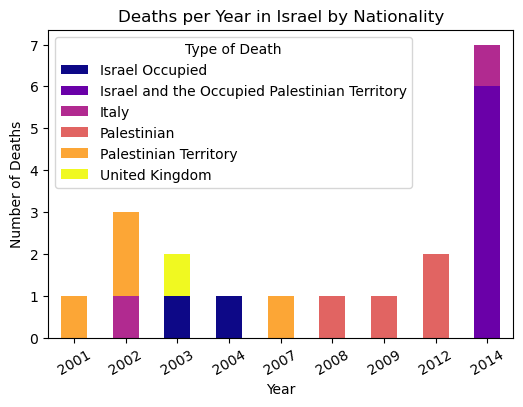

In [32]:
per_year = all_Israel.groupby(['Year', 'Nationality']).size().reset_index(name='Count')
pivot_df = per_year.pivot(index='Year', columns='Nationality', values='Count').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='plasma')

plt.title('Deaths per Year in Israel by Nationality')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')


plt.xticks(rotation=30)
plt.legend(title='Type of Death')
plt.show()

In [33]:
murdered_IL = all_Israel[all_Israel['Type_death'] == 'Murder'].shape[0]
killed_War_IL = all_Israel[all_Israel['Type_death'] == ('Crossfire/Combat-Related')].shape[0]

print('The number of murdered in our country:', murdered_IL)
print('Total death in wars:', killed_War_IL)

The number of murdered in our country: 1
Total death in wars: 14


In [34]:
sports = all_Israel['Sports'].sum()
crime = all_Israel['Crime'].sum()
war = all_Israel['War'].sum()
human_rights = all_Israel['Human Rights'].sum()
culture = all_Israel['Culture'].sum()
corruption = all_Israel['Corruption'].sum()
politics = all_Israel['Politics'].sum()
business = all_Israel['Business'].sum()

In [35]:
will_count = [sports, crime, war, human_rights, culture, corruption, politics, business]
covers = ['Sports', 'Crime', 'War', 'Human Rights', 'Culture', 'Corruption','politics', 'Business']

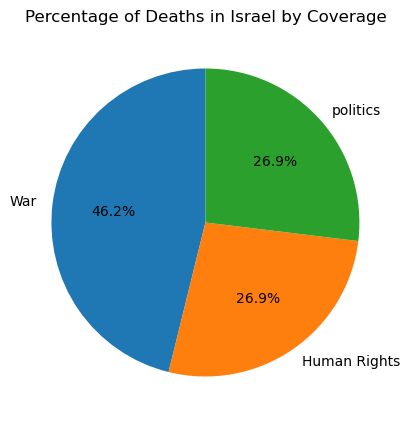

In [36]:
filt_counts = [count for count in will_count if count > 0]
filt_fields = [field for field, count in zip(covers, will_count) if count > 0]

plt.figure(figsize=(5, 5))
plt.pie(filt_counts, labels=filt_fields, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Deaths in Israel by Coverage')
plt.show()

<div dir="rtl">
    
### מסקנה 3 - האם יש קשר בין חודשים / שנים למקרי המוות ?

<div dir="rtl">

###### בישראל יש עיתונאים המסקרים באזורים שונים - גם בתוך ישראל, גם בשטחי יהודה ושומרון וגם בעזה. עצם העובדה שיש פחות נרצחים בארץ עוזר להסיק כי יש חשיבות רבה במדינה לשמור על חיי עיתונאים, ולא משנה מה מוצאם. 3 מבין כלל ההרוגים הם עיתונאים זרים והשאר הם ערבים ישראלים או פלסטינים.
###### למרות זאת, ישראל היא זירת קרב בשל המלחמות שבה, עיתונאים המסקרים כאן חשופים לסכנות הכרוכות בשהייה ממושכת באזורים אלה.
###### ייתכן ויש רצון אמיתי לשמור על חיי העיתונאים, אך יש גם אפשרות שישראל מודאגת ממה יגידו עליה בעולם. יש המון אנטישמיות וביקורות אחרות כלפי ישראל, ועדיף להימנע ממוות מיותר של עיתונאים זרים

In [37]:
years_counts = jour_df['Year'].value_counts().sort_index()
month_counts = jour_df['Month'].value_counts().sort_index()

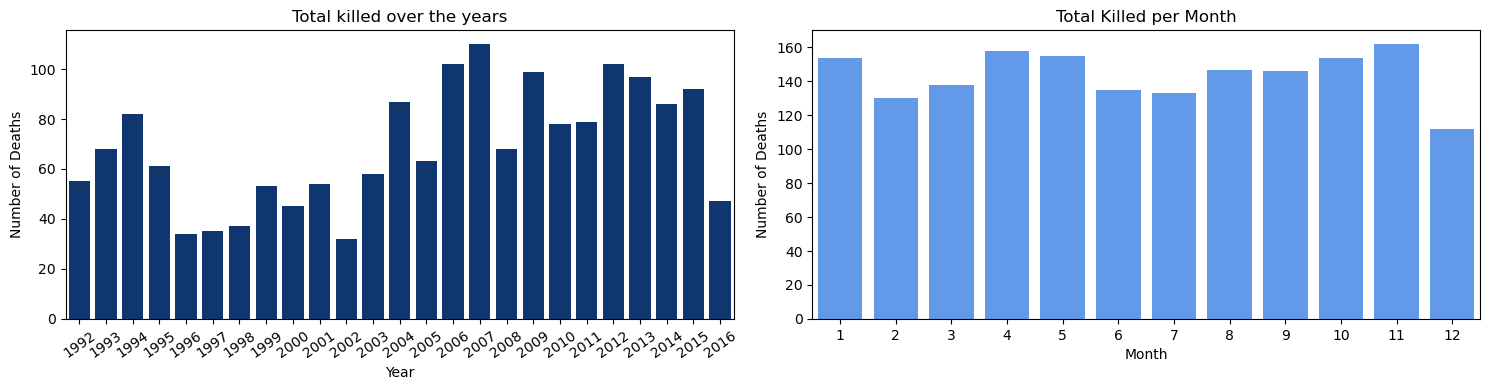

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# death every year - RED
sns.barplot(ax=axes[0], x=years_counts.index, y=years_counts.values, color="#003380")
axes[0].set_title('Total killed over the years')
axes[0].set_ylabel('Number of Deaths')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=35)

# death every month - ORANGE
sns.barplot(ax=axes[1], x=month_counts.index, y=month_counts.values, color="#4d94ff")
axes[1].set_title('Total Killed per Month')
axes[1].set_ylabel('Number of Deaths')
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

<div dir="rtl">
לא מצאנו כי קיים קשר ישיר בין שנה או חודש ספציפי לבין מקרי מוות של עיתונאים. אין דפוס מסויים שאפשר לטעון בעזרתו טענות. נמשיך להעמיק ולבחון קשרים בין תאריכים שאולי יובילו אותנו לאירועים משמעותיים

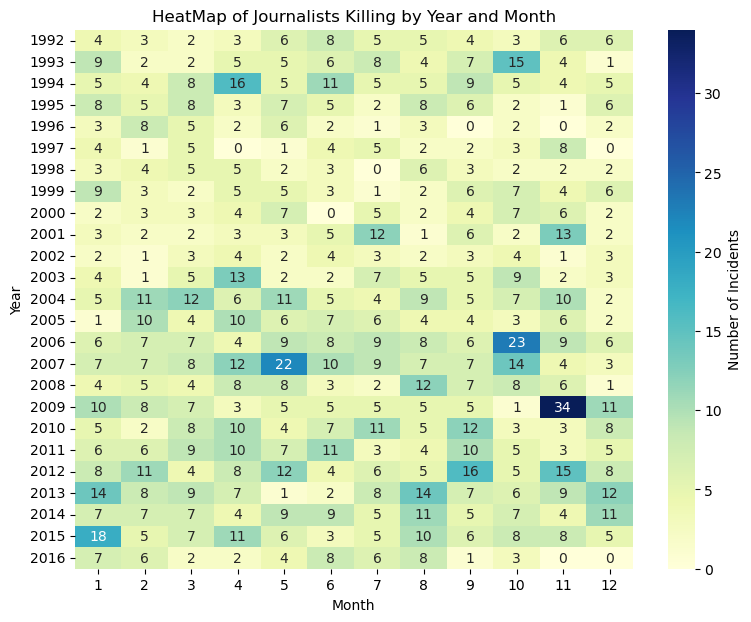

In [39]:
pivot_table = jour_df.pivot_table(index='Year', columns='Month', aggfunc='size', fill_value=0)
plt.figure(figsize=(9, 7))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Incidents'})
plt.title('HeatMap of Journalists Killing by Year and Month')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

<div dir="rtl">

#### ראינו קודם כי הפיליפינים, סוריה ועיראק מובילות במקרי הרצח.
#### האם יש קשר בין ריכוז ההרוגים לבין תאריכים ספציפיים?
##### נחפש אירועים מרכזיים:
________    
###### **טבח מגינדנאו - פיליפינים 23 בנובמבר 2009** 
###### טבח זה נחשב לאחת התקריות הקשות ביותר נגד אנשי תקשורת, במהלכה רצחו לפחות 57 בני אדם וביניהם 32 עיתונאים,
###### ותומכים של ראש העיר. אותו ראש עיר קיבל איומים והוא חשב שנוכחות התקשורת תמנע ממנו להיפגע.
###### יתרה מכך, הוא ביקש שלצדו יהיו נשים בתקווה שבנשים לא יפגעו.
###### באותו יום כל העיתונאים נרצחו ללא קשר בין המינים

###### **מתקפת טרור בפריז - 7 בינואר 2015**
###### באותה מתקפה, מחבלים תקפו את משרדי העיתון "שארל הבדו" בפריז ופתחו באש, בין ההרוגים היו עורכים שוטרים ועיתונאים.
###### המתקפה בוצעה על ידי פעילי ג'יהאד איסלאמי והייתה בתגובה לתוכן שפורסם בעיתון.